# CLASSIFICATION MODEL-Build a model that classifies the side effect of a drug by age,gender.

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset to python environment 

In [2]:
df=pd.read_csv('archive.zip')
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [4]:
df.shape

(362806, 12)

In [5]:
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [6]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [7]:
df.nunique()    # finding the unique values in the columns

Age                  12
Condition          1806
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250167
Satisfaction          7
Sex                   3
Sides              1651
UsefulCount         148
dtype: int64

In [8]:
for i in df.columns:
    print('Unique values in',i, 'are :')
    print(df[i].value_counts())
    print('*'*50)

Unique values in Age are :
45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
              12202
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64
**************************************************
Unique values in Condition are :
Other                                                  49765
Pain                                                   25232
High Blood Pressure                                    23275
Depression                                             14509
Birth Control                                          12253
                                                       ...  
Hereditary Tyrosinemia Type I                              1
Pneumonia Acquired from Being Treated In a Hospital        1
Anemia due to Depressed Bone Marrow                        1
Vomiting in Children due to Acute Gastroenteritis          1
Sinus Bradycard

# EDA

In [9]:
cn1= int (0)
cn2= int (0)
for i in df['Sex']:
  if i=='Male':
    cn1+=1
  elif i=='Female':
    cn2+=1
print(cn1)
print(cn2)

98043
238226


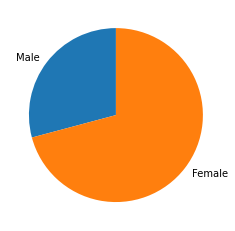

In [10]:
y=np.array([cn1,cn2])
mylabels = ["Male","Female"]
plt.pie(y,labels = mylabels, startangle = 90)
plt.show() 

From this graph it is clear that female patients are more

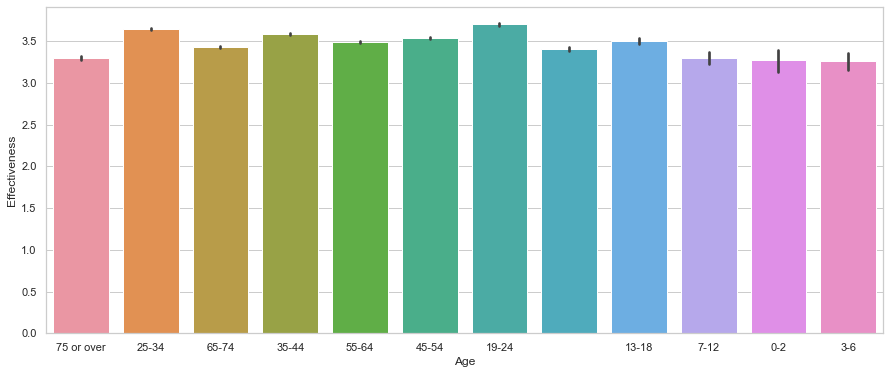

In [11]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,6))
ax = sns.barplot(x="Age", y="Effectiveness", data=df)


From this graph the drug is more effective to patients in the age group 19-24 and less effective with age group 3-6 and 75 or above 

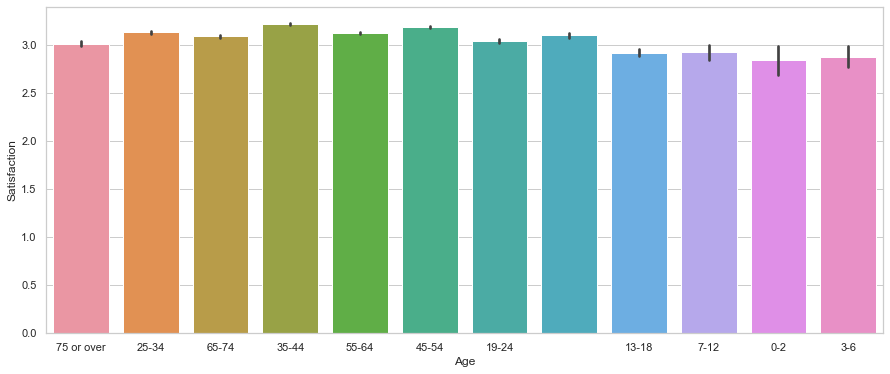

In [12]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,6))
ax = sns.barplot(x="Age", y="Satisfaction", data=df)

From this graph the drug is more satisfied with age group 35-44 and less satisfied with age group 0-2.

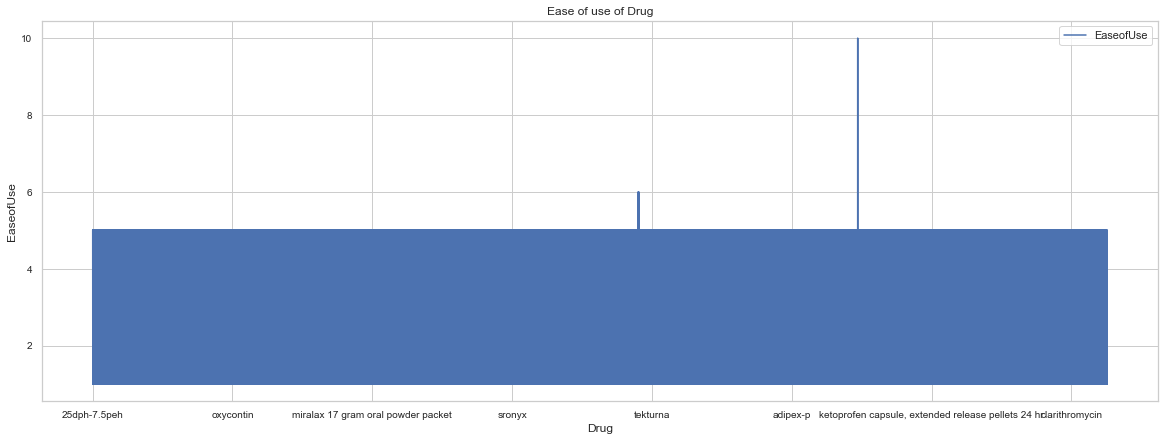

In [13]:
import matplotlib.pyplot as plt
#fig = plt.figure(figsize =(100, 7))
df.plot(x="Drug", y=["EaseofUse"],figsize =(20, 7), fontsize=10)
plt.xlabel("Drug")
plt.ylabel("EaseofUse")
plt.title("Ease of use of Drug")
plt.show()

# DATA PRE-PROCESSING

# 1. Handling Null Values

array([[<AxesSubplot:title={'center':'DrugId'}>,
        <AxesSubplot:title={'center':'EaseofUse'}>],
       [<AxesSubplot:title={'center':'Effectiveness'}>,
        <AxesSubplot:title={'center':'Satisfaction'}>],
       [<AxesSubplot:title={'center':'UsefulCount'}>, <AxesSubplot:>]],
      dtype=object)

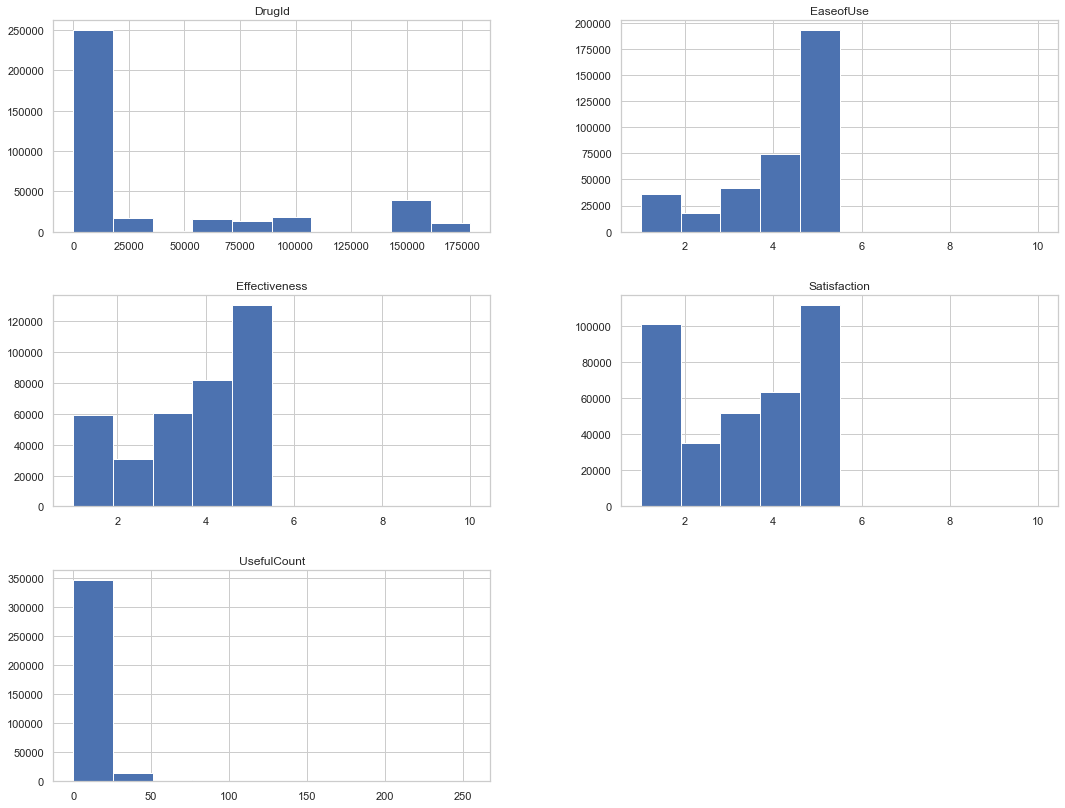

In [14]:
# plotting histograms

df.hist(figsize=(18, 14))

In [15]:
df.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [16]:
df.isnull().sum().sort_values(ascending=False)

Reviews          37
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

We have only one feature with missing value.that is, there are 37 missing vales in the feature Reviews.Since it is a categorical feature so we will replace it with the mode value. The mode value is the value that appears more than any other value. Hence here we are replacing it with the review that appears the most often.


In [17]:
## For the missing values in the review column, replace it with mode (value that appears most often)

df['Reviews'].fillna(df.Reviews.mode().to_string(), inplace=True)

In [18]:
df.isnull().sum().sort_values(ascending=False)

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

# 2. Handling Outliers

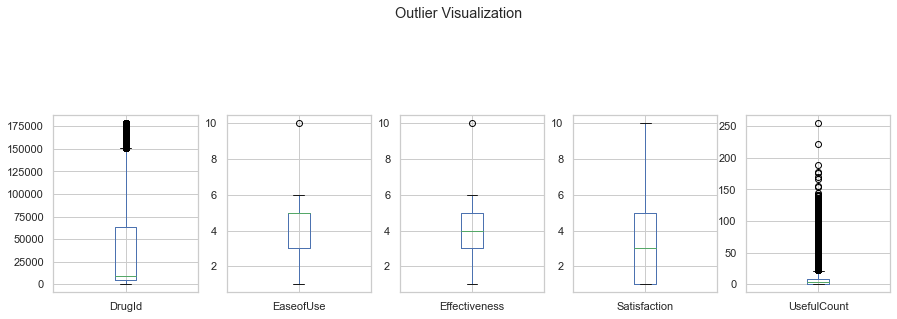

In [19]:
#plotting boxplot

df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,15),title='Outlier Visualization')
plt.show()

In [20]:
#finding the 25th percentile and 75th percentile.
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

 #Inter Quantile Range
IQR=Q3-Q1

#finding lower and upper  bounds for all values.All values outside these bounds are outliers.
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
#finding the sum of the outliers in each column of int and float types.
((df.select_dtypes(include=['float64','int64'])<lower_limit) | (df.select_dtypes(include=['float64','int64'])>upper_limit)).sum()

DrugId           29796
EaseofUse            1
Effectiveness        1
Satisfaction         0
UsefulCount      23247
dtype: int64

Outliers are present in four columns.That is ,in DrugID,Easeofuse,Effectiveness,Satisfaction,UsefulCount. 
But for 'DrugId' and 'UsefulCount', the number of outliers is very large.Thus its removal will affect our problem. 
Hence we will deal  with columns 'EaseofUse' and 'Effectiveness'. 

# 1. checking the outlier in 'EaseofUse' column

Text(0.5, 1.0, 'Box plot  of EaseofUse')

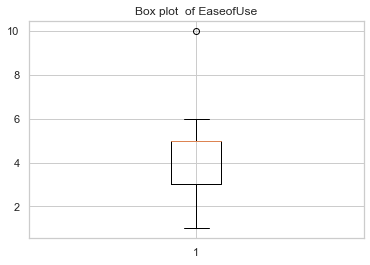

In [21]:
plt.boxplot(df['EaseofUse'])
plt.title('Box plot  of EaseofUse')

In [22]:
Q1=np.percentile(df['EaseofUse'],25,interpolation='midpoint')
Q2=np.percentile(df['EaseofUse'],50,interpolation='midpoint')   
Q3=np.percentile(df['EaseofUse'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3) 

#finding IQR
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)          
print(up_lim)

3.0
5.0
5.0
0.0
8.0


In [23]:
#removing outlier using for loop
outlier=[]
for x in df['EaseofUse']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
len(outlier)

1

Text(0.5, 1.0, 'Box plot of EaseofUse')

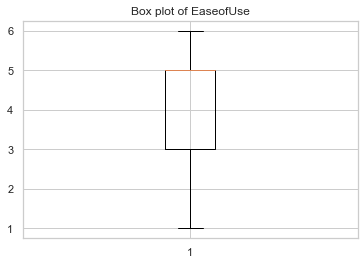

In [24]:
#Removing the outliers
ind1=df['EaseofUse']>up_lim
df.loc[ind1].index
df.drop(df.loc[ind1].index,inplace=True)
plt.boxplot(df['EaseofUse'])
plt.title('Box plot of EaseofUse')

# 2. checking 'Effectiveness' column

Text(0.5, 1.0, 'Box plot  of Effectiveness')

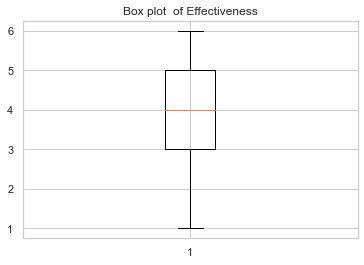

In [25]:
plt.boxplot(df['Effectiveness'])
plt.title('Box plot  of Effectiveness')

In [26]:
Q1=np.percentile(df['Effectiveness'],25,interpolation='midpoint')
Q2=np.percentile(df['Effectiveness'],50,interpolation='midpoint')   
Q3=np.percentile(df['Effectiveness'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3) 

#finding IQR
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)          
print(up_lim)

3.0
4.0
5.0
0.0
8.0


In [27]:
#removing outlier using for loop
outlier=[]
for x in df['Effectiveness']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
len(outlier)

0

Text(0.5, 1.0, 'Box plot of Effectiveness')

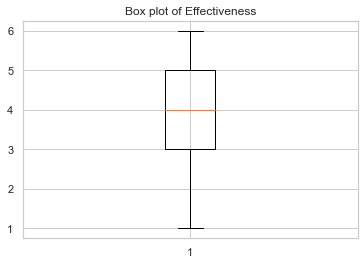

In [28]:
#Removing the outliers
ind1=df['Effectiveness']>up_lim
df.loc[ind1].index
df.drop(df.loc[ind1].index,inplace=True)
plt.boxplot(df['Effectiveness'])
plt.title('Box plot of Effectiveness')

# Feature Reduction

In [29]:
#let's remove the columns Reviews and UsefulCount.Because it is not useful and do not provide any information for our predictive model.

df= df.drop([ 'Reviews', 'UsefulCount','Date'],axis=1)



In [30]:
df.shape

(362805, 9)

# Correlation Matrix

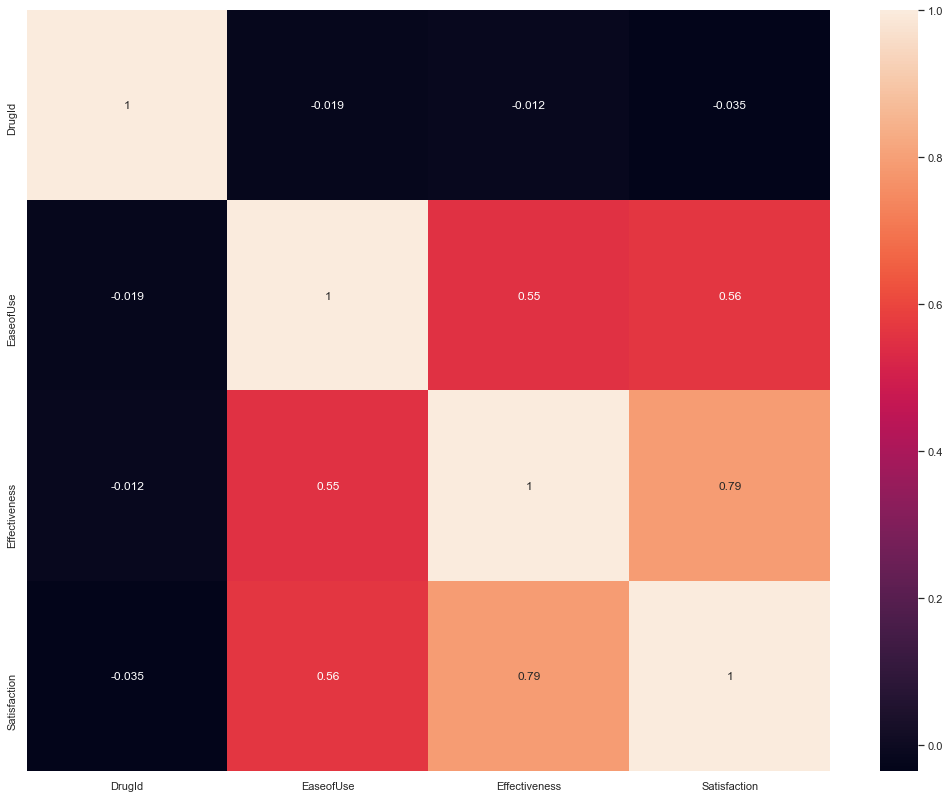

In [31]:
# plottting the heatmap in order to see the correlation.

fig, ax = plt.subplots(figsize=(18,14))
sns.heatmap(df.corr(), annot=True, ax=ax);

# Encoding

In [32]:
category_columns = ['Condition','Drug', 'Sex','Age']
df[category_columns] = df[category_columns].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362805 entries, 0 to 362805
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Age            362805 non-null  category
 1   Condition      362805 non-null  category
 2   Drug           362805 non-null  category
 3   DrugId         362805 non-null  int64   
 4   EaseofUse      362805 non-null  int64   
 5   Effectiveness  362805 non-null  int64   
 6   Satisfaction   362805 non-null  int64   
 7   Sex            362805 non-null  category
 8   Sides          362805 non-null  object  
dtypes: category(4), int64(4), object(1)
memory usage: 27.1+ MB


In [33]:
# Performing label encoding to the categorical variables.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = ['Condition','Drug', 'Sex','Age']
for column in categorical_columns:
   df[column] = le.fit_transform(df[column])


In [34]:
df.head()

,Age,Condition,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides
0,11,1596,4,146724,5,5,5,2,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,4,424,4,146724,5,5,5,1,"Drowsiness, dizziness , dry mouth /nose/thro..."
2,9,1184,6866,144731,2,3,3,1,
3,11,1184,6866,144731,2,2,1,1,
4,6,1184,6866,144731,1,1,1,2,


In [35]:
df.dtypes

Age               int32
Condition         int32
Drug              int32
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Satisfaction      int64
Sex               int32
Sides            object
dtype: object

We have encoded all the categorical values into numerical form.

# Feature Scaling-StandardScaler

In [36]:
# Splitting dataset into x and y
y = df['Sides']
X = df.drop('Sides', axis = 1)

In [37]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
X = standardisation.fit_transform(X)

# MODELING

In [38]:
# Splitting dataset into x and y
y = df['Sides']
X = df.drop('Sides', axis = 1)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [40]:
X_train.shape

(290244, 8)

# LOGISTIC REGRESSION

In [41]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
X,y=make_classification(n_samples=1000,n_features=10,n_informative=5,n_redundant=5,n_classes=3,random_state=1)
model=LogisticRegression(multi_class='multinomial',solver='lbfgs')
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores=cross_val_score(model,X,y,scoring='accuracy',cv=cv,n_jobs=1)
print('Mean Accuracy:%.3f(%.3f)'%(mean(n_scores),std(n_scores)))

Mean Accuracy:0.681(0.042)


# KNN

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, precision_score
from sklearn.metrics import plot_confusion_matrix

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
# Identifty the best values for n_neighbors
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    kncdf = KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    model = kncdf.fit(X_train,y_train)
    predictions = model.predict(X_test)
    acc_values.append(accuracy_score(y_test, predictions))
    
acc_values

[0.9597304337040559,
 0.9554857292484944,
 0.9563264012348232,
 0.9522332933669602,
 0.9516544700321109,
 0.9474097655765494,
 0.9456319510480837,
 0.942710271357892,
 0.9411667424649606,
 0.939071953253125,
 0.9374870798362757,
 0.9349512823693169]

Text(0, 0.5, 'Accuracy')

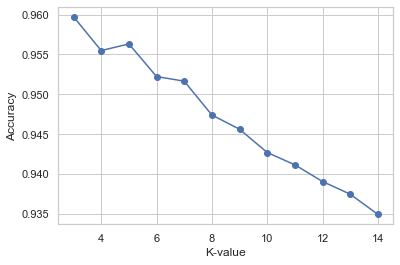

In [45]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel("K-value")
plt.ylabel("Accuracy")

In [46]:
#kncdf = KNeighborsClassifier(leaf_size=1,n_neighbors=5,metric="minkowski",p=1)
#model = kncdf.fit(X_train,y_train)
#predictions = model.predict(X_test)
#plot_confusion_matrix(kncdf, X_test, y_test)
#print(classification_report(y_test, predictions))

In [47]:
kncdf=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
kncdf.fit(X_train,y_train)
y_pred=kncdf.predict(X_test)

In [48]:
print("Accuracy is:",accuracy_score(y_test,predictions))


Accuracy is: 0.9349512823693169


In [49]:
confusion_matrix(y_test,predictions)

array([[3040,    0,    0, ...,    0,    0,    0],
       [   0,    1,    0, ...,    0,    0,    0],
       [   0,    0,    2, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   1,    0,    0, ...,    0,   15,    0],
       [   0,    0,    0, ...,    0,    0,   14]], dtype=int64)

In [50]:
df.describe

<bound method NDFrame.describe of         Age  Condition  Drug  DrugId  EaseofUse  Effectiveness  Satisfaction  \
0        11       1596     4  146724          5              5             5   
1         4        424     4  146724          5              5             5   
2         9       1184  6866  144731          2              3             3   
3        11       1184  6866  144731          2              2             1   
4         6       1184  6866  144731          1              1             1   
...     ...        ...   ...     ...        ...            ...           ...   
362801    8       1587  1244  144470          5              5             5   
362802    0       1184  1244  144470          2              3             1   
362803    4       1587  1244  144470          2              4             2   
362804    8       1587  1244  144470          5              5             5   
362805    7       1587  1244  144470          4              5             5   

     

# Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt_model=DecisionTreeClassifier()

In [53]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
y_pred=dt_model.predict(X_test)

In [55]:
print("accuracy on Decision tree model is :",accuracy_score(y_test,y_pred))

accuracy on Decision tree model is : 0.9875001722688497


In [56]:
y_test.value_counts()

                                                                                                                                                                                                       3496
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                                                                          3102
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.                                                       2486
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                                                                1841
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.                                              

# RANDOM FOREST CLASSIFIER

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf_model=RandomForestClassifier(class_weight='balanced',random_state=1,max_depth=5, \
                                n_estimators=500,max_features=1)

In [64]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=1,
                       n_estimators=500, random_state=1)

In [65]:
prediction=rf_model.predict(X_test)

In [66]:
print("accuracy on Random Forest model is :",accuracy_score(y_test,prediction))

accuracy on Random Forest model is : 0.012913272970328413


# HYPERPARAMETER TUNING-K-NN

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,5))
n_neighbors = list(range(3,4))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()

In [59]:
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

C:\Users\Anitta\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best leaf_size: 4
Best p: 1
Best n_neighbors: 3


In [60]:
kncdf = KNeighborsClassifier(leaf_size=4,n_neighbors=3,metric="minkowski",p=1)
model = kncdf.fit(X_train,y_train)
predictions = model.predict(X_test)


In [61]:
print("Accuracy is:",accuracy_score(y_test,predictions))


Accuracy is: 0.9638097600639461


# HYPERPARAMETER TUNING-Decision Tree Classifier

In [ ]:
dt=DecisionTree Classifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params={'max_depth':[2,3,5,10,20],'min_samples_leaf':[5,10,20,50,100],'criterion':["gini","entropy"]}

In [ ]:
grid_search=GridSearchCV(estimator=dt,param_grid=params,cv=4,n_jobs=-1,scoring="accuracy")

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
score_df=pd.DataFrme(grid_search.cv_results_)
score_df.head()

In [ ]:
score_df.nlargest(5,"mean_test_score")

In [ ]:
grid_search.best_estimator_

In [ ]:
dt_best=grid_search.best_estimator_

In [ ]:
evaluate_model(dt_best)

# TUNING- random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 3)]
# Number of features to consider at every split
max_features = ['sqrt']
max_depth = []
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

In [ ]:
rf_random.best_params_

In [ ]:
rf = RandomForestClassifier(random_state = 42,n_estimators= 750,max_features='sqrt')


In [ ]:
model = rf.fit(X_train,y_train)
predictions = model.predict(X_test)
plot_confusion_matrix(rf, X_test, y_test)
print(classification_report(y_test, predictions))